In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/data.csv',encoding='ISO-8859-1')
df.head(2)

<ipython-input-2-c9d14a8c320e>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/data.csv',encoding='ISO-8859-1')


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01


In [3]:
df.duplicated().sum()

np.int64(674)

In [4]:
df.shape

(435742, 13)

In [5]:
df.drop_duplicates(inplace=True)
df.isna().sum()

,0
stn_code,144077
sampling_date,3
state,0
location,3
agency,149466
type,5357
so2,34632
no2,16222
rspm,40035
spm,236908


In [6]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 435068 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     290991 non-null  object 
 1   sampling_date                435065 non-null  object 
 2   state                        435068 non-null  object 
 3   location                     435065 non-null  object 
 4   agency                       285602 non-null  object 
 5   type                         429711 non-null  object 
 6   so2                          400436 non-null  float64
 7   no2                          418846 non-null  float64
 8   rspm                         395033 non-null  float64
 9   spm                          198160 non-null  float64
 10  location_monitoring_station  407765 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435061 non-null  object 
dtypes: f

In [8]:
df.describe()

,so2,no2,rspm,spm,pm2_5
count,400436.000000,418846.000000,395033.000000,198160.000000,9314.000000
mean,10.830468,25.823296,108.871711,220.774796,40.791467
std,11.168994,18.497878,74.898637,151.374791,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [9]:
df["date"] = df["date"].replace("1997-01", "1997-01-01")


In [10]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')
df['year'] = df['date'].dt.year
df['year'] = df['year'].fillna(df["year"].min())
df['year'] = df['year'].values.astype(int)

In [11]:
df.drop(columns = ['stn_code','sampling_date','agency','location_monitoring_station','date'],inplace = True)

In [12]:
df.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'year'],
      dtype='object')

In [13]:
df['type'].unique()

array(['Residential, Rural and other Areas', 'Industrial Area', nan,
       'Sensitive Area', 'Industrial Areas', 'Residential and others',
       'Sensitive Areas', 'Industrial', 'Residential', 'RIRUO',
       'Sensitive'], dtype=object)

In [14]:
df.dropna(subset = ['type'],inplace = True)

In [15]:
df.isna().sum()

,0
state,0
location,0
type,0
so2,34174
no2,15837
rspm,34878
spm,236274
pm2_5,420397
year,0


<ipython-input-16-a81334bb78c8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['no2'])


<Axes: xlabel='no2', ylabel='Density'>

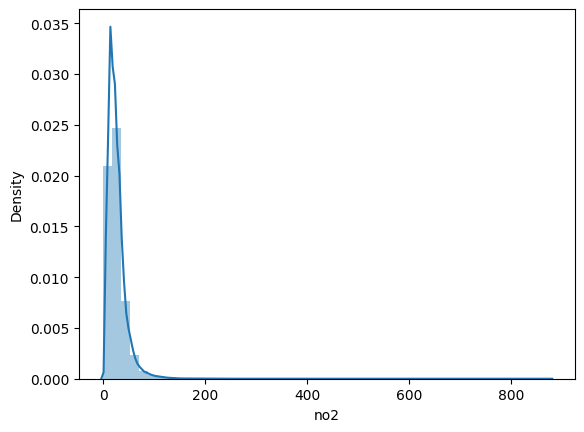

In [16]:
sns.distplot(df['no2'])

In [17]:
df['no2_log'] = np.log1p(df['no2'])
df['no2_log'].fillna(df['no2_log'].median(), inplace=True)
df['no2'] = np.expm1(df['no2_log'])

<ipython-input-17-459db4bdebf2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['no2_log'].fillna(df['no2_log'].median(), inplace=True)


In [18]:
df['so2_log'] = np.log1p(df['so2'])
df['so2_log'].fillna(df['so2_log'].median(), inplace=True)
df['so2'] = np.expm1(df['so2_log'])

<ipython-input-18-cd678f1bd4b8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['so2_log'].fillna(df['so2_log'].median(), inplace=True)


In [19]:
df.drop(columns = ['no2_log','so2_log'],inplace = True)

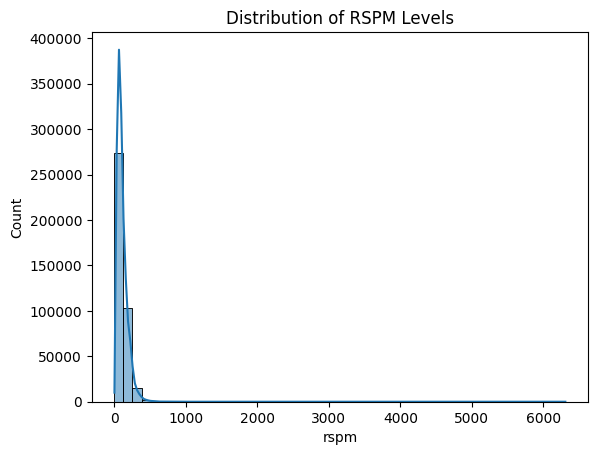

In [20]:
sns.histplot(df['rspm'], kde=True, bins=50)
plt.title("Distribution of RSPM Levels")
plt.show()

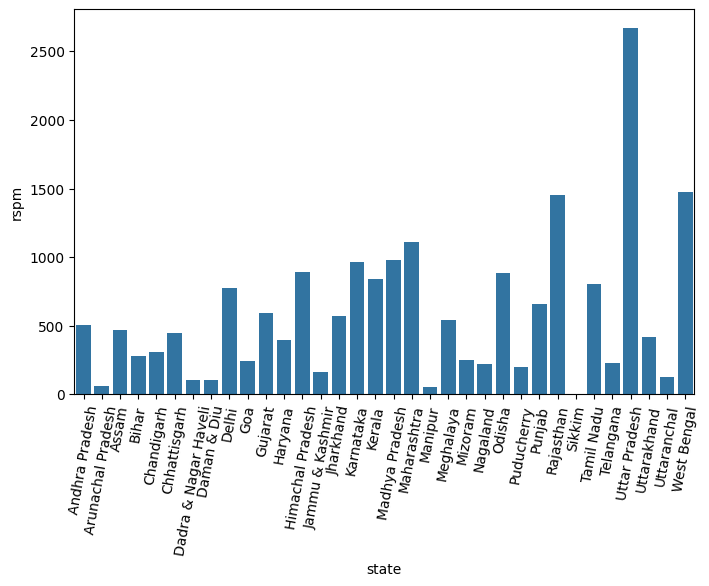

In [21]:
m = df.groupby('state')['rspm'].nunique().reset_index()
m
# Plot Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x='state', y='rspm', data=m)
plt.xticks(rotation=80)
plt.show()

In [22]:
df['rspm'] = df.groupby('state')['rspm'].transform(lambda x: x.fillna(x.median()))


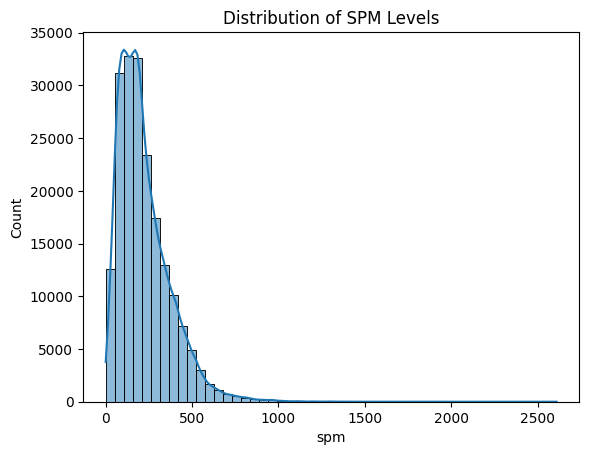

In [23]:
sns.histplot(df['spm'], kde=True, bins=50)
plt.title("Distribution of SPM Levels")
plt.show()

In [24]:
df['spm'].fillna(df['spm'].median(), inplace=True)


<ipython-input-24-a9a9cc7d2dc7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['spm'].fillna(df['spm'].median(), inplace=True)


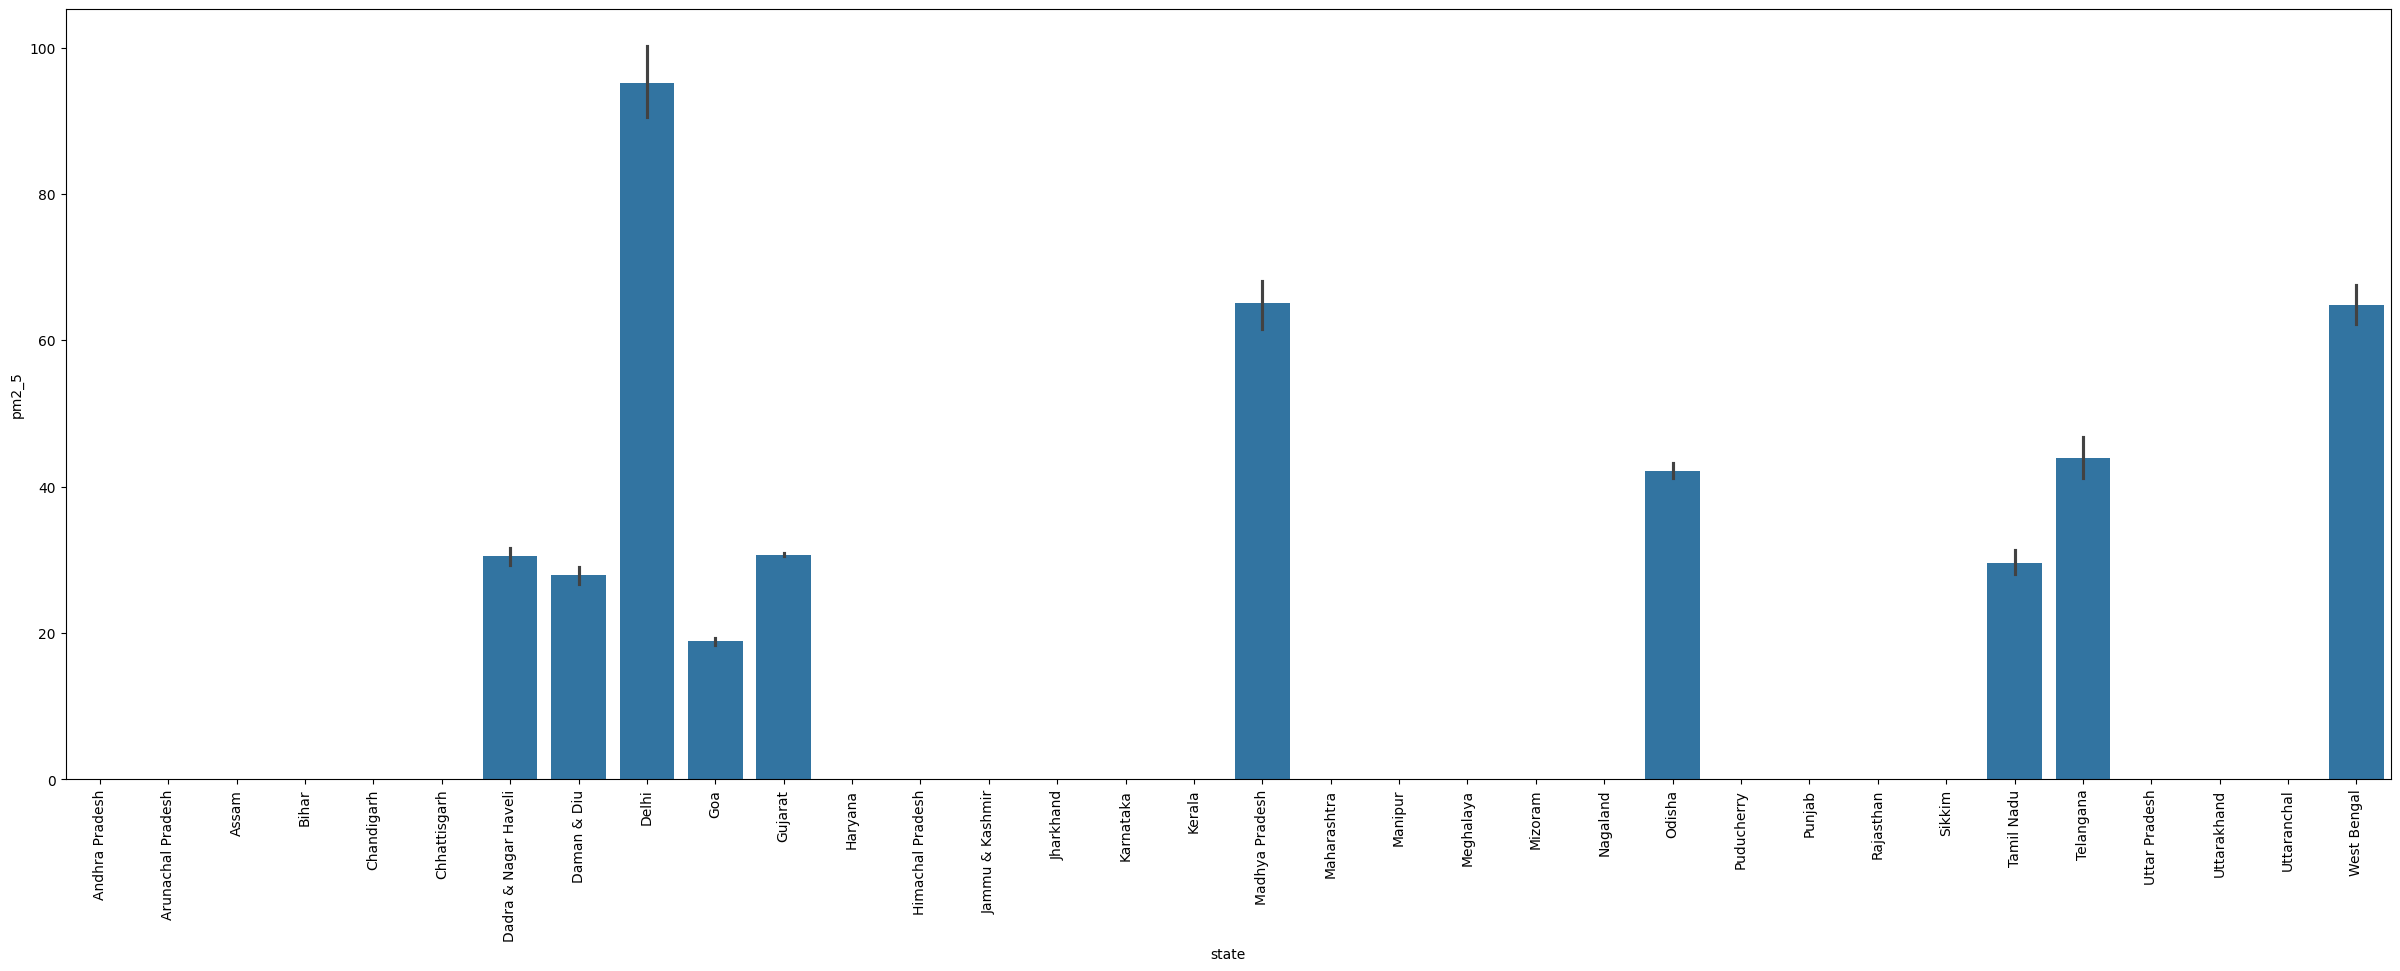

In [25]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='pm2_5',data=df);

In [26]:
df.isna().sum()

,0
state,0
location,0
type,0
so2,0
no2,0
rspm,0
spm,0
pm2_5,420397
year,0


<ipython-input-27-37c7055c8523>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x = "type", kind = "count",  data = df, height=5, aspect = 4,palette="dark")


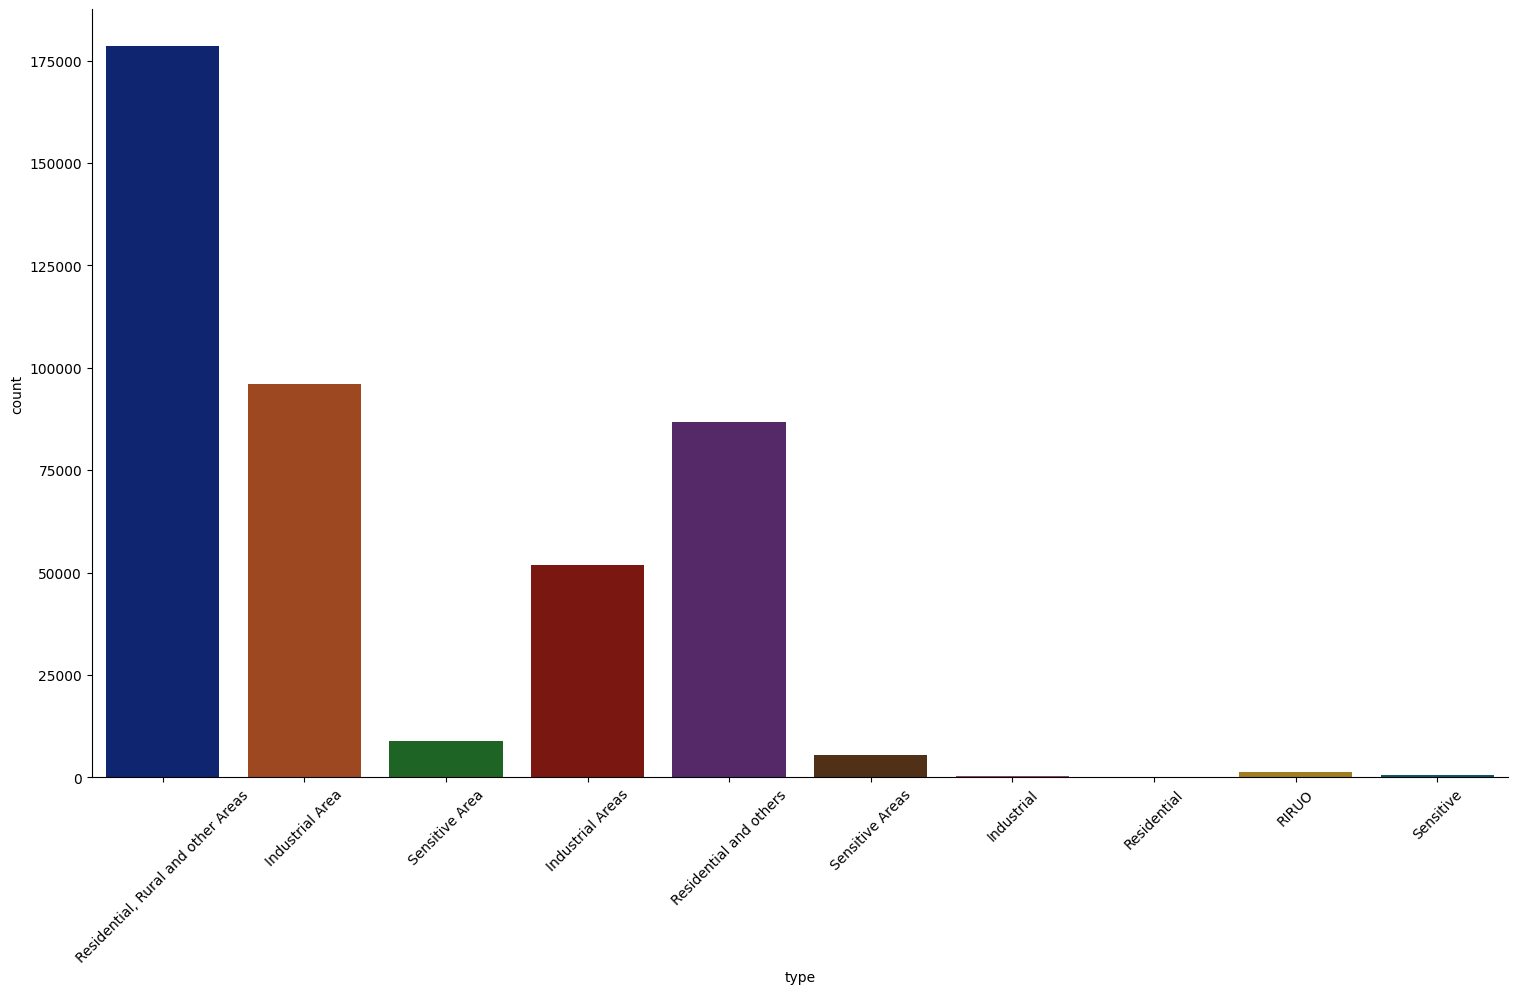

In [27]:
g = sns.catplot(x = "type", kind = "count",  data = df, height=5, aspect = 4,palette="dark")
g.set_xticklabels(rotation=45)
g.fig.set_size_inches(15, 9)
plt.show()

# Analysis by type and pollution means

<Axes: xlabel='type'>

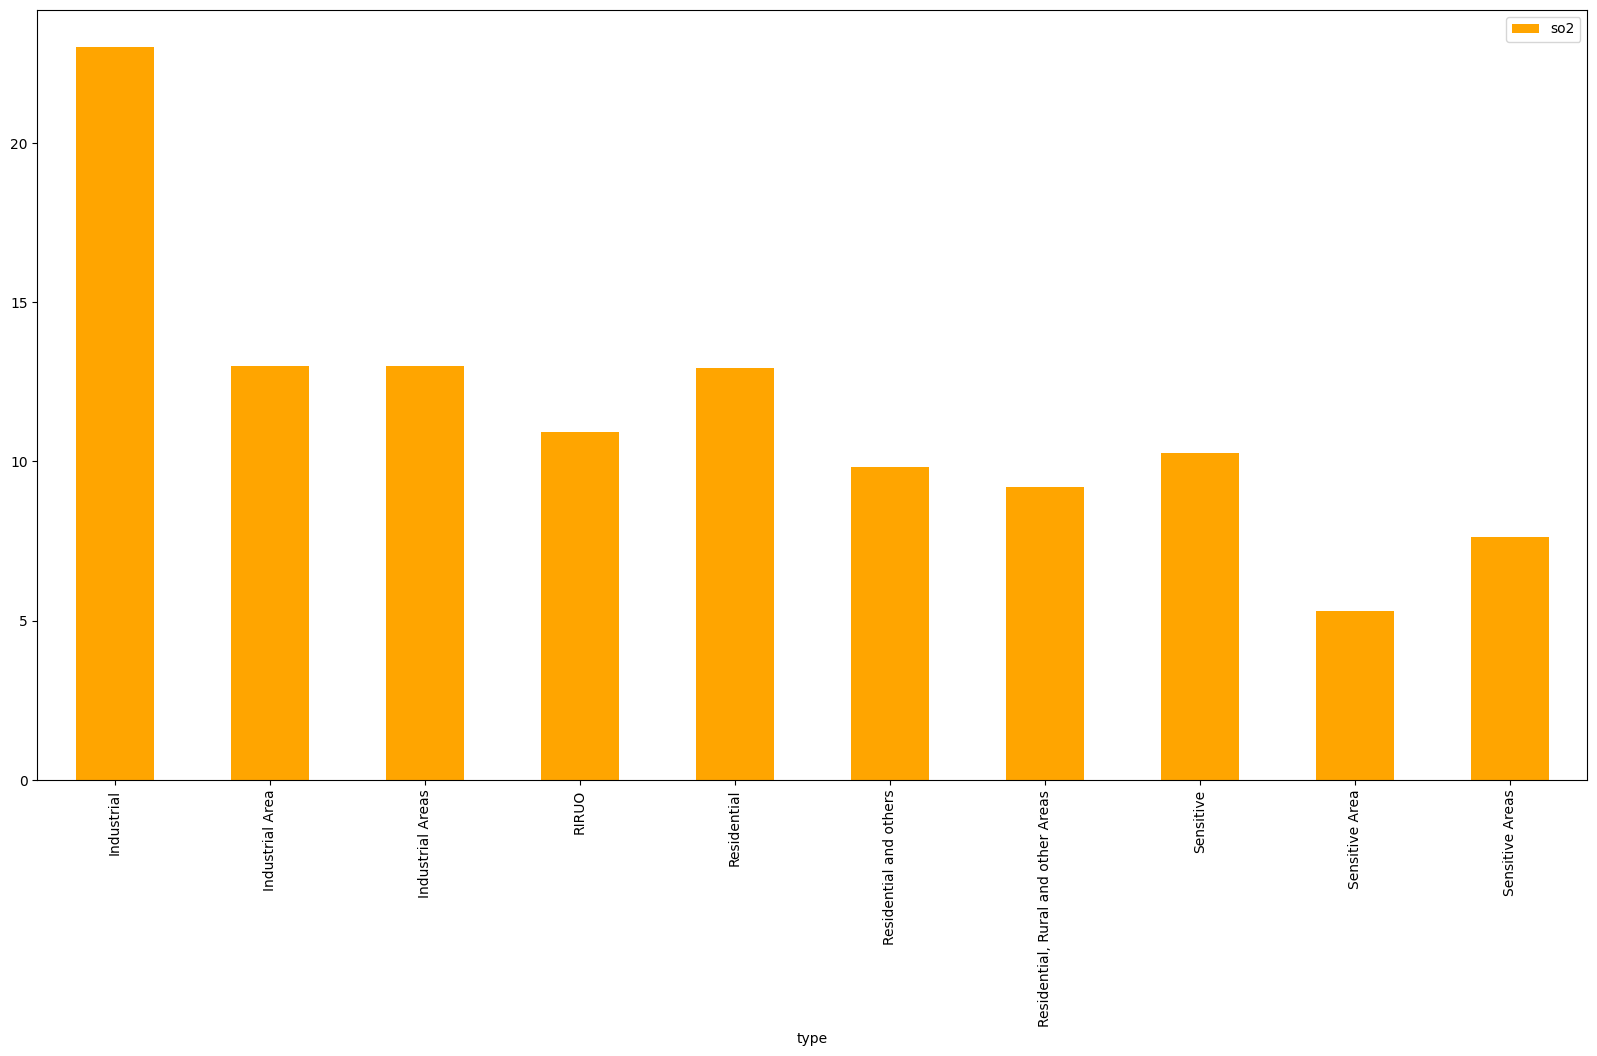

In [28]:
grp = df.groupby(["type"])["so2"].mean().to_frame()
grp.plot.bar(figsize = (20,10), color={"orange"})

<Axes: xlabel='type'>

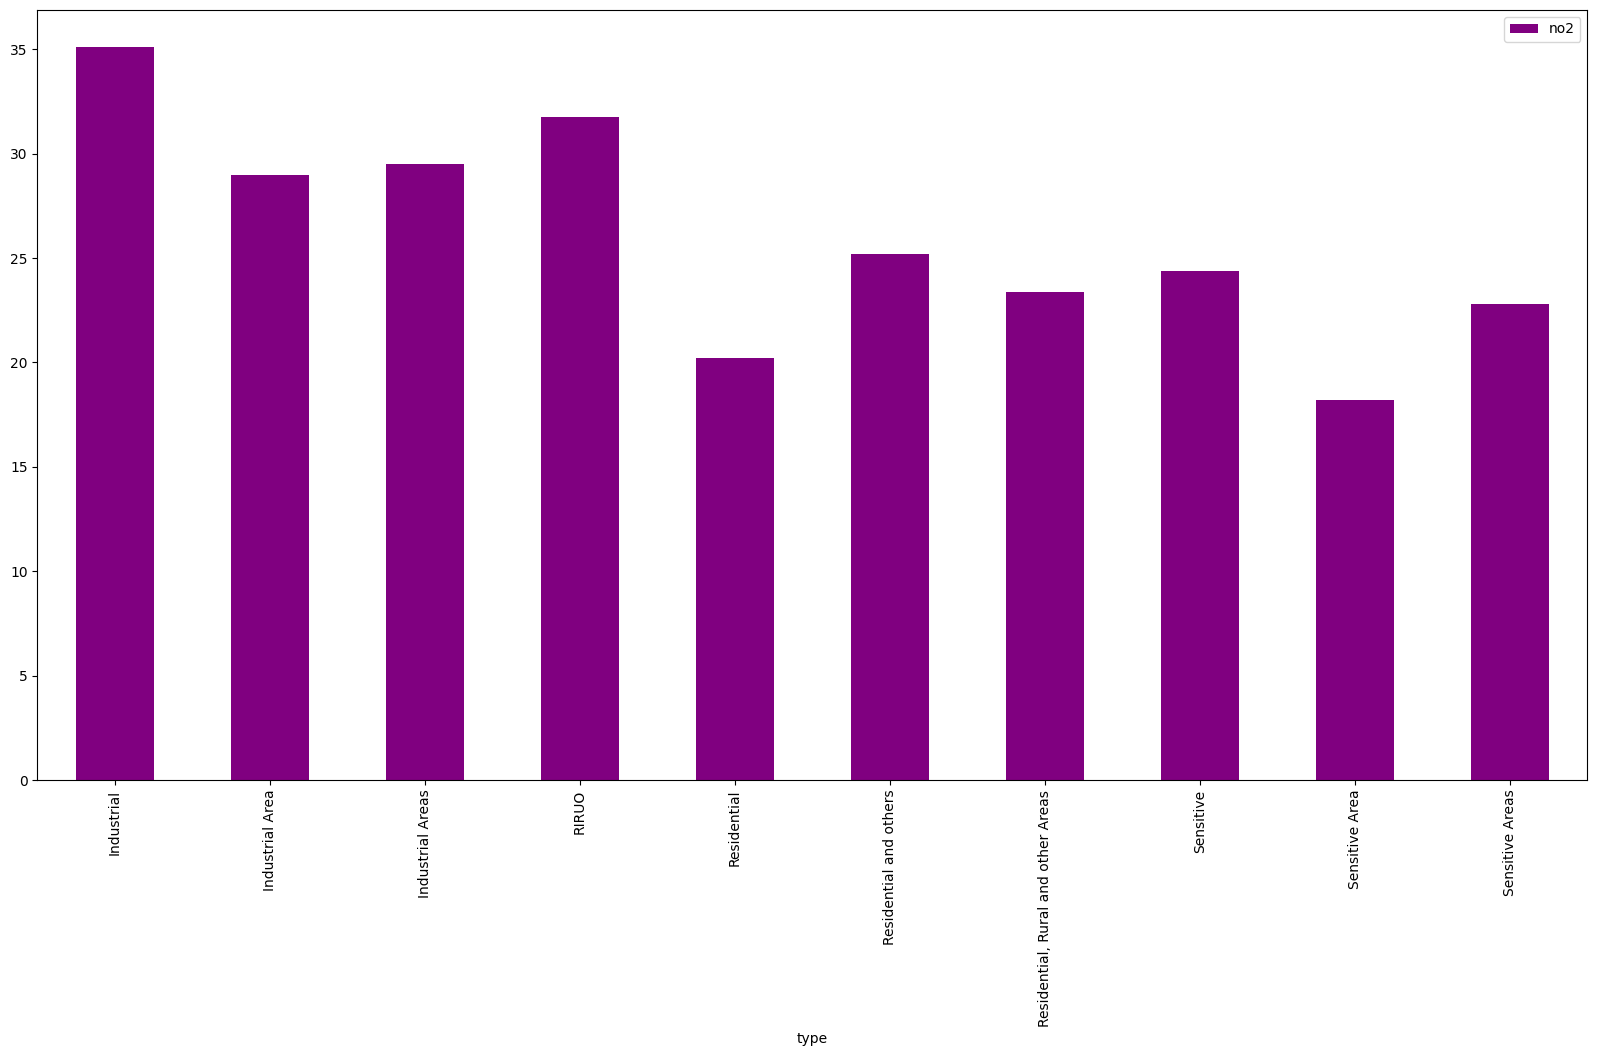

In [29]:
grp = df.groupby(["type"])["no2"].mean().to_frame()
grp.plot.bar(figsize = (20,10), color={"purple"})

# SO2 variation Statewise

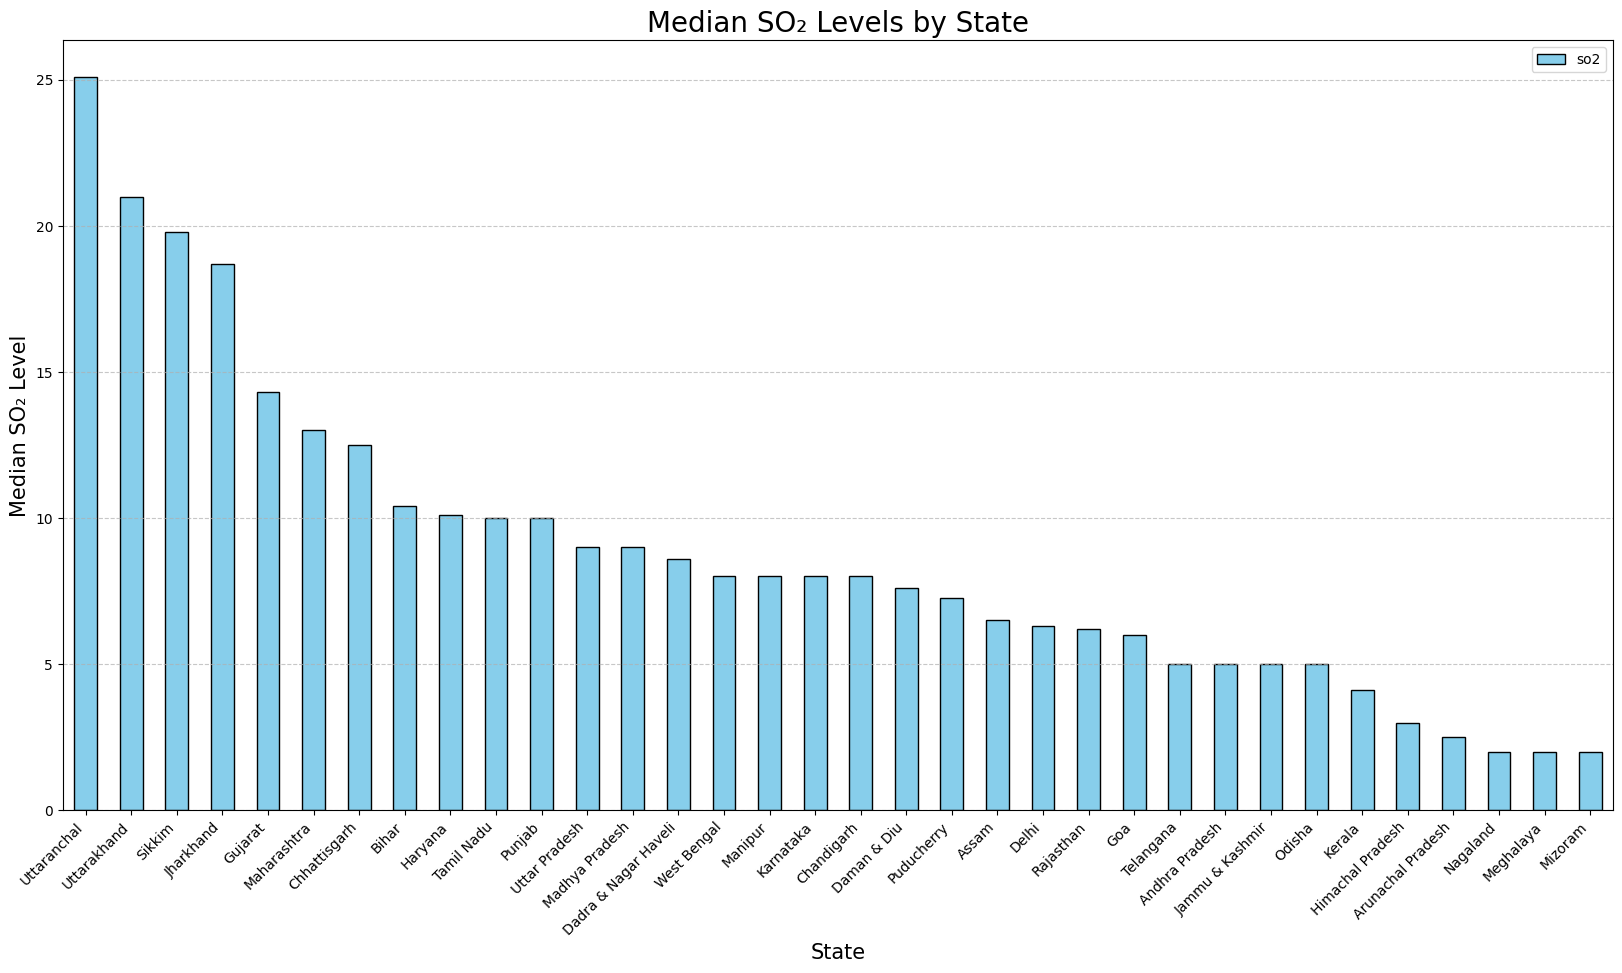

In [30]:
import matplotlib.pyplot as plt

df[['so2', 'state']].groupby(['state']).median().sort_values("so2", ascending=False).plot(
    kind='bar', figsize=(20, 10), color='skyblue', edgecolor='black'
)

plt.title("Median SO₂ Levels by State", fontsize=20)
plt.xlabel("State", fontsize=15)
plt.ylabel("Median SO₂ Level", fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


<Axes: title={'center': 'Median SO₂ Levels Over Years'}, xlabel='year'>

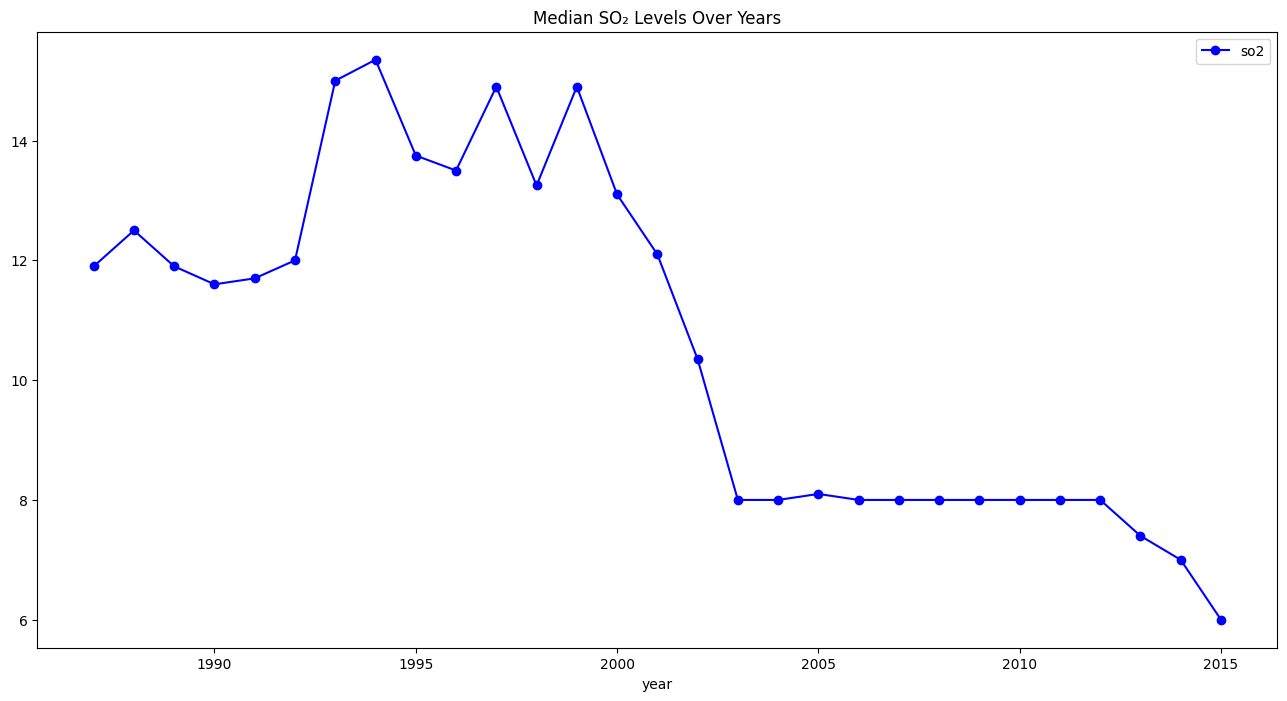

In [31]:
df[['so2', 'year']].groupby("year").median().sort_values(by='year', ascending=False).plot(
    kind='line', marker='o', figsize=(16, 8), color='b', title="Median SO₂ Levels Over Years"
)


# NO2 Analysis

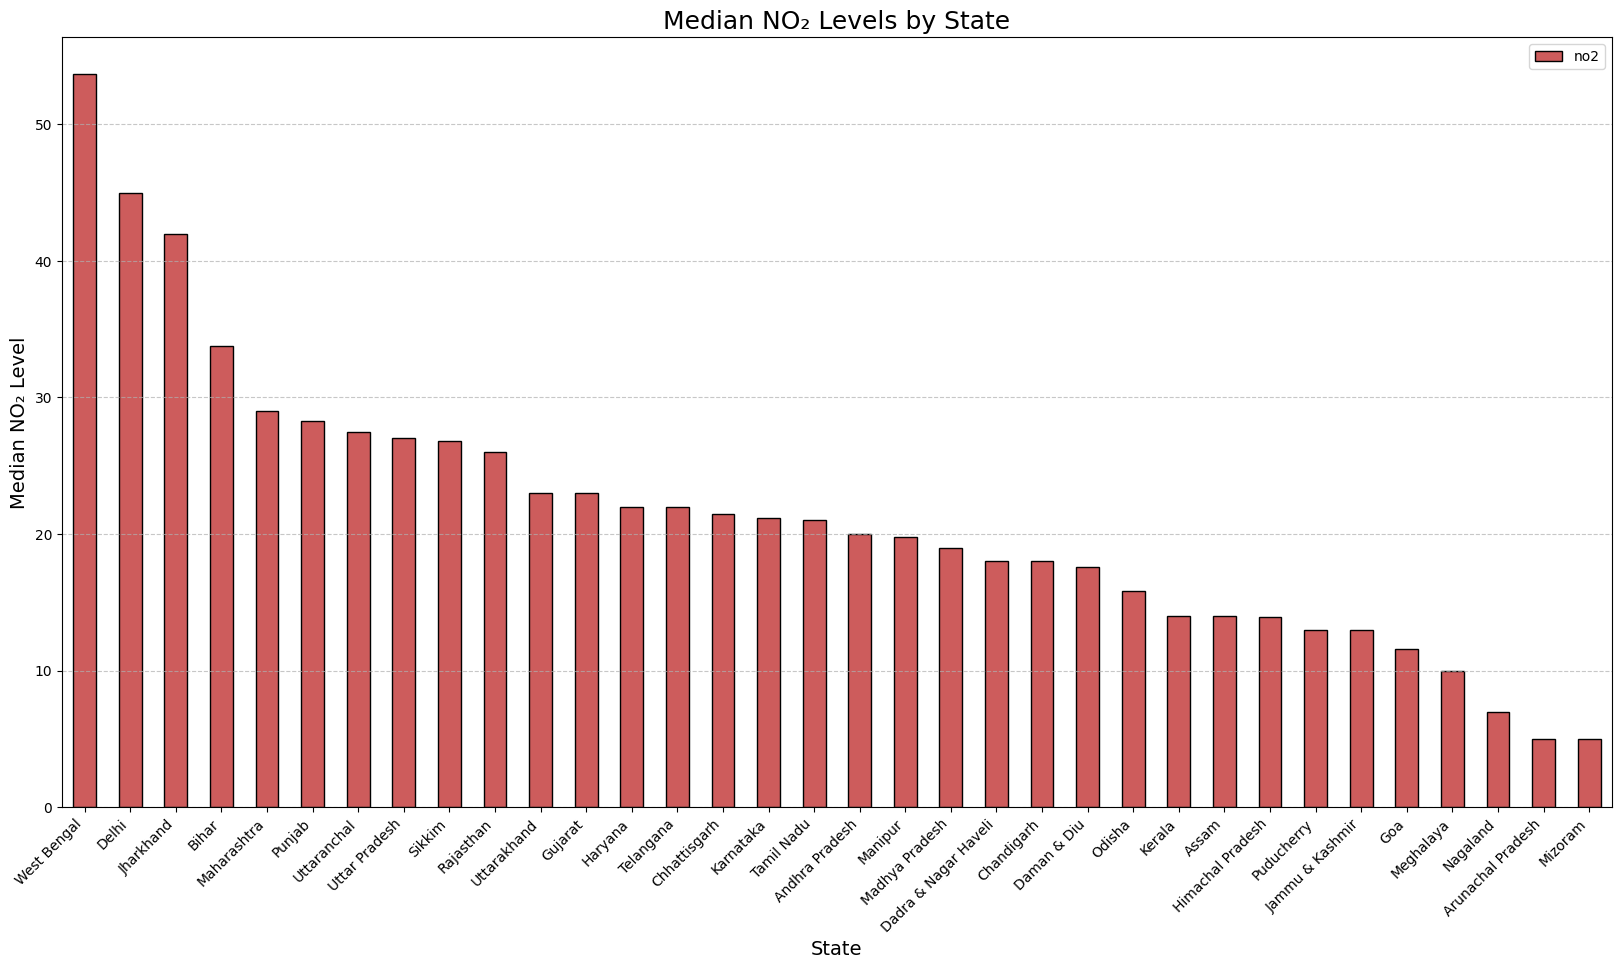

In [32]:
import matplotlib.pyplot as plt

df[['no2', 'state']].groupby(['state']).median().sort_values("no2", ascending=False).plot.bar(
    figsize=(20, 10), color='indianred', edgecolor='black'
)

plt.title("Median NO₂ Levels by State", fontsize=18)
plt.xlabel("State", fontsize=14)
plt.ylabel("Median NO₂ Level", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


<Axes: title={'center': 'Median NO₂ Levels Over Years'}, xlabel='year'>

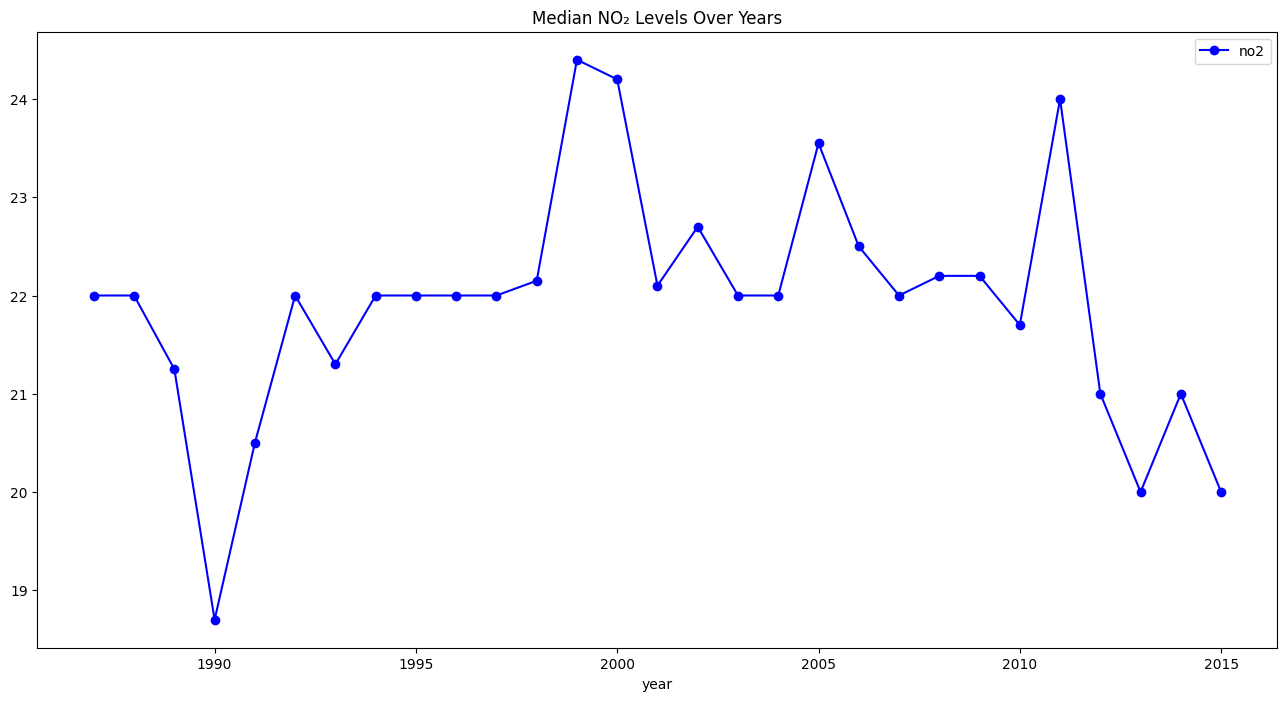

In [33]:
df[['no2', 'year']].groupby("year").median().sort_values(by='year', ascending=False).plot(
    kind='line', marker='o', figsize=(16, 8), color='b', title="Median NO₂ Levels Over Years"
)


# Function to calculate so2 individual pollutant index(si)

In [34]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
df['SOi']=df['so2'].apply(cal_SOi)
data= df[['so2','SOi']]
data.head()

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


# Function to calculate no2 individual pollutant index(ni)

In [35]:
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
df['NOi']=df['no2'].apply(cal_Noi)
data= df[['no2','NOi']]
data.head()

,no2,NOi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


# Function to calculate rspm individual pollutant index(rpi)

In [36]:
df['rspm'].unique()

array([ 74.  , 143.7 , 124.7 , ..., 175.09, 104.18, 981.  ])

In [37]:
def cal_RSPMI(rspm):
    if rspm <= 30:
        rpi = rspm * 50 / 30
    elif rspm <= 60:
        rpi = 50 + (rspm - 30) * 50 / 30
    elif rspm <= 90:
        rpi = 100 + (rspm - 60) * 100 / 30
    elif rspm <= 120:
        rpi = 200 + (rspm - 90) * 100 / 30
    elif rspm <= 250:
        rpi = 300 + (rspm - 120) * (100 / 130)
    else:
        rpi = 400 + (rspm - 250) * (100 / 130)


    return rpi

df['Rpi'] = df['rspm'].apply(cal_RSPMI)

print(df[['rspm', 'Rpi']].sample(10))



          rspm         Rpi
178104   97.00  223.333333
295958  166.00  335.384615
231939  193.00  356.153846
248076   63.00  110.000000
178895   97.00  223.333333
326711  166.00  335.384615
308981   67.33  124.433333
260216   92.00  206.666667
98175    91.00  203.333333
282631   40.00   66.666667


# Function to calculate spm individual pollutant index(spi)

In [38]:
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi

df['SPMi']=df['spm'].apply(cal_SPMi)
# data= df[['spm','SPMi']]
print(df[['spm', 'SPMi']].sample(10))

          spm        SPMi
412263  188.0  158.666667
4256    211.0  174.000000
348191   30.0   30.000000
121514  188.0  158.666667
195516  188.0  158.666667
117636  188.0  158.666667
200883   95.7   95.700000
98038    20.0   20.000000
111979  195.0  163.333333
347190  120.0  113.333333


# Function to calculate the air quality index (AQI) of every data value

In [39]:
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['NOi'],x['Rpi'],x['SPMi']),axis=1)
data= df[['state','SOi','NOi','Rpi','SPMi','AQI']]
data.sample(5)

,state,SOi,NOi,Rpi,SPMi,AQI
343739,Tamil Nadu,47.125,55.500,91.666667,137.333333,137.333333
66238,Delhi,16.750,45.625,339.230769,158.666667,339.230769
416597,West Bengal,10.000,39.750,180.000000,167.333333,180.000000
397979,Uttar Pradesh,10.000,13.750,200.000000,158.666667,200.000000
3111,Andhra Pradesh,6.375,34.375,200.000000,202.000000,202.000000


In [40]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

df['AQI_Range'] = df['AQI'] .apply(AQI_Range)
df.sample(5)

,state,location,type,so2,no2,rspm,spm,pm2_5,year,SOi,NOi,Rpi,SPMi,AQI,AQI_Range
255445,Maharashtra,Latur,"Residential, Rural and other Areas",5.0,26.0,84.0,188.0,NaN,2015,6.25,32.50,180.000000,158.666667,180.000000,Poor
121233,Himachal Pradesh,Kala Amb,"Residential, Rural and other Areas",2.0,13.8,105.0,188.0,NaN,2013,2.50,17.25,250.000000,158.666667,250.000000,Unhealthy
172482,Kerala,Kochi,Industrial Area,2.0,5.0,24.0,188.0,NaN,2014,2.50,6.25,40.000000,158.666667,158.666667,Poor
355638,Tamil Nadu,Coimbatore,Industrial Area,2.0,15.0,92.0,188.0,NaN,2012,2.50,18.75,206.666667,158.666667,206.666667,Unhealthy
364615,Telangana,Hyderabad,"Residential, Rural and other Areas",5.0,28.0,104.0,188.0,NaN,2014,6.25,35.00,246.666667,158.666667,246.666667,Unhealthy


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 429711 entries, 0 to 435738
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   state      429711 non-null  object 
 1   location   429711 non-null  object 
 2   type       429711 non-null  object 
 3   so2        429711 non-null  float64
 4   no2        429711 non-null  float64
 5   rspm       429711 non-null  float64
 6   spm        429711 non-null  float64
 7   pm2_5      9314 non-null    float64
 8   year       429711 non-null  int64  
 9   SOi        429711 non-null  float64
 10  NOi        429711 non-null  float64
 11  Rpi        429711 non-null  float64
 12  SPMi       429711 non-null  float64
 13  AQI        429711 non-null  float64
 14  AQI_Range  429711 non-null  object 
dtypes: float64(10), int64(1), object(4)
memory usage: 52.5+ MB


In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["type"] = le.fit_transform(df["type"])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 429711 entries, 0 to 435738
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   state      429711 non-null  object 
 1   location   429711 non-null  object 
 2   type       429711 non-null  int64  
 3   so2        429711 non-null  float64
 4   no2        429711 non-null  float64
 5   rspm       429711 non-null  float64
 6   spm        429711 non-null  float64
 7   pm2_5      9314 non-null    float64
 8   year       429711 non-null  int64  
 9   SOi        429711 non-null  float64
 10  NOi        429711 non-null  float64
 11  Rpi        429711 non-null  float64
 12  SPMi       429711 non-null  float64
 13  AQI        429711 non-null  float64
 14  AQI_Range  429711 non-null  object 
dtypes: float64(10), int64(2), object(3)
memory usage: 52.5+ MB


In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["AQI_Range"] = le.fit_transform(df["AQI_Range"])


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 429711 entries, 0 to 435738
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   state      429711 non-null  object 
 1   location   429711 non-null  object 
 2   type       429711 non-null  int64  
 3   so2        429711 non-null  float64
 4   no2        429711 non-null  float64
 5   rspm       429711 non-null  float64
 6   spm        429711 non-null  float64
 7   pm2_5      9314 non-null    float64
 8   year       429711 non-null  int64  
 9   SOi        429711 non-null  float64
 10  NOi        429711 non-null  float64
 11  Rpi        429711 non-null  float64
 12  SPMi       429711 non-null  float64
 13  AQI        429711 non-null  float64
 14  AQI_Range  429711 non-null  int64  
dtypes: float64(10), int64(3), object(2)
memory usage: 52.5+ MB


In [46]:
df.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'year', 'SOi', 'NOi', 'Rpi', 'SPMi', 'AQI', 'AQI_Range'],
      dtype='object')

In [47]:
df.head(2)

,state,location,type,so2,no2,rspm,spm,pm2_5,year,SOi,NOi,Rpi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,6,4.8,17.4,74.0,188.0,NaN,1990,6.000,21.75,146.666667,158.666667,158.666667,3
1,Andhra Pradesh,Hyderabad,1,3.1,7.0,74.0,188.0,NaN,1990,3.875,8.75,146.666667,158.666667,158.666667,3


In [48]:
df.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'year', 'SOi', 'NOi', 'Rpi', 'SPMi', 'AQI', 'AQI_Range'],
      dtype='object')

In [49]:
df.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'year', 'SOi', 'NOi', 'Rpi', 'SPMi', 'AQI', 'AQI_Range'],
      dtype='object')

# ***Classification***

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Split Data
X = df.drop(columns=["AQI", "AQI_Range", "state", "location"])
y = df["AQI_Range"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define Model
rf = RandomForestClassifier(random_state=42, warm_start=True)

# Optimized Hyperparameter Search Space
rf_params = {
    "n_estimators": [50, 100, 150],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5]
}


rf_random = RandomizedSearchCV(
    rf,
    rf_params,
    n_iter=10,
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2,
    random_state=42,
)

# Train Model
rf_random.fit(X_train, y_train)

# Best RF Model
best_rf = rf_random.best_estimator_
print("Best Parameters:", rf_random.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 150, 'min_samples_split': 2, 'max_depth': 20}


In [51]:
df.head(2)

,state,location,type,so2,no2,rspm,spm,pm2_5,year,SOi,NOi,Rpi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,6,4.8,17.4,74.0,188.0,NaN,1990,6.000,21.75,146.666667,158.666667,158.666667,3
1,Andhra Pradesh,Hyderabad,1,3.1,7.0,74.0,188.0,NaN,1990,3.875,8.75,146.666667,158.666667,158.666667,3


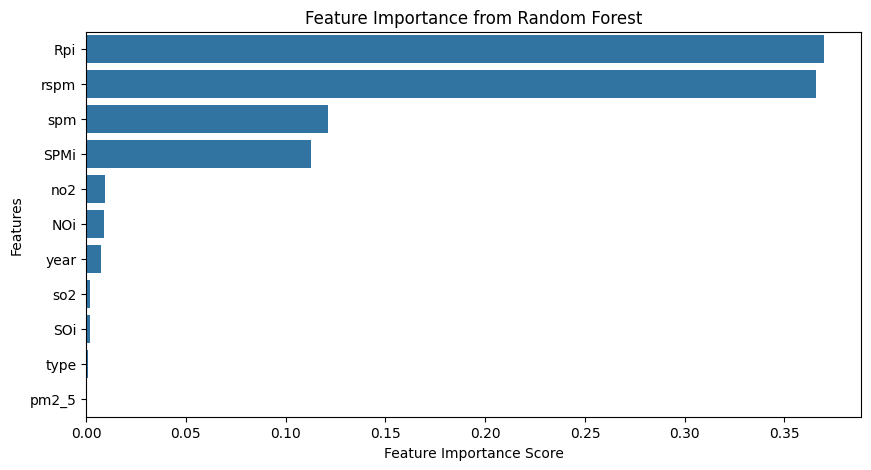

In [52]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=70)
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance
feature_importance = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10,5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance from Random Forest")
plt.show()


# Selecting best features for Classification

In [53]:
top_n = 10

# Get the top N important features
top_features = feature_importance.index[:top_n]

# Keep only these features in X_train and X_test
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

print(f"Selected Features: {list(top_features)}")

Selected Features: ['Rpi', 'rspm', 'spm', 'SPMi', 'no2', 'NOi', 'year', 'so2', 'SOi', 'type']


In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Encode AQI Range (Convert categories to numbers)
label_encoder = LabelEncoder()
df["AQI_Range"] = label_encoder.fit_transform(df["AQI_Range"])

rf = RandomForestClassifier(random_state=42)
rf_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10]
}

rf_grid = RandomizedSearchCV(rf, rf_params, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
rf_grid.fit(X_train_selected, y_train)

# Best RF Model
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test_selected)

# XGBoost Classifier #
xgb = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
xgb_params = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2]
}

xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
xgb_grid.fit(X_train_selected, y_train)

# Best XGBoost Model
best_xgb = xgb_grid.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_selected)

# Model Evaluation #
def evaluate_model(model_name, y_true, y_pred):
    print(f"📊 {model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("-" * 50)

evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 Random Forest Performance:
Accuracy: 0.9992
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.97       977
           1       1.00      1.00      1.00      6408
           2       0.99      1.00      1.00      5325
           3       1.00      1.00      1.00     35366
           4       1.00      1.00      1.00     14482
           5       1.00      1.00      1.00     23385

    accuracy                           1.00     85943
   macro avg       1.00      0.99      0.99     85943
weighted avg       1.00      1.00      1.00     85943

Confusion Matrix:
 [[  912     1    26    31     4     3]
 [    0  6406     0     0     0     2]
 [    0     0  5323     2     0     0]
 [    0     0     1 35365     0     0]
 [    0     0     0     1 14481     0]
 [    0     0     0     0     0 23385]]
--------------------------------------------------
📊 XGBoost Performance:
Accuracy: 0.9954
Classification Report:
               prec

In [55]:
def predict_aqi(model, input_features):
    input_df = pd.DataFrame([input_features], columns=X_train_selected.columns)

    predicted_class = model.predict(input_df)[0]

    predicted_label = label_encoder.inverse_transform([predicted_class])[0]

    return predicted_label


In [56]:
# Select a specific index from the test set
index = 9

# Get the actual AQI range
actual_aqi = label_encoder.inverse_transform([y_test.iloc[index]])[0]

# Get the predicted AQI range
predicted_aqi_rf = predict_aqi(best_rf, X_test_selected.iloc[index].tolist())
predicted_aqi_xgb = predict_aqi(best_xgb, X_test_selected.iloc[index].tolist())

print(f"\n🎯 Sample Index: {index}")
print(f"✅ Actual AQI Range: {actual_aqi}")
print(f"🟢 RF Predicted AQI Range: {predicted_aqi_rf}")
print(f"🔵 XGB Predicted AQI Range: {predicted_aqi_xgb}")



🎯 Sample Index: 9
✅ Actual AQI Range: 5
🟢 RF Predicted AQI Range: 5
🔵 XGB Predicted AQI Range: 5


In [57]:
# Training accuracy
train_acc_rf = accuracy_score(y_train, best_rf.predict(X_train_selected))
test_acc_rf = accuracy_score(y_test, best_rf.predict(X_test_selected))

train_acc_xgb = accuracy_score(y_train, best_xgb.predict(X_train_selected))
test_acc_xgb = accuracy_score(y_test, best_xgb.predict(X_test_selected))

print("📊 Random Forest:")
print(f"✅ Training Accuracy: {train_acc_rf:.4f}")
print(f"✅ Test Accuracy: {test_acc_rf:.4f}\n")

print("📊 XGBoost:")
print(f"✅ Training Accuracy: {train_acc_xgb:.4f}")
print(f"✅ Test Accuracy: {test_acc_xgb:.4f}")


📊 Random Forest:
✅ Training Accuracy: 1.0000
✅ Test Accuracy: 0.9992

📊 XGBoost:
✅ Training Accuracy: 0.9958
✅ Test Accuracy: 0.9954


# ***Regression***

In [58]:
df['AQI_Range'].unique()

array([3, 4, 5, 0, 1, 2])

# Splitting the dataset into Dependent and Independent columns

In [59]:
df.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'year', 'SOi', 'NOi', 'Rpi', 'SPMi', 'AQI', 'AQI_Range'],
      dtype='object')

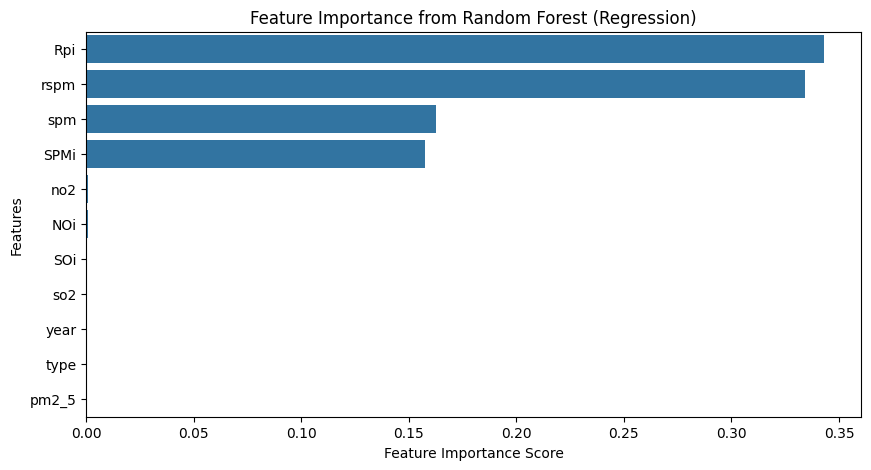

Selected Features: ['Rpi', 'rspm', 'spm', 'SPMi', 'no2', 'NOi']


In [60]:
from sklearn.ensemble import RandomForestRegressor

X = df.drop(columns=["AQI", "AQI_Range", "state", "location"])
y = df["AQI_Range"]


# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance from Random Forest (Regression)")
plt.show()

# Select Top N Features
top_n = 6
top_features = feature_importance.index[:top_n]

# Keep only these features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

print(f"Selected Features: {list(top_features)}")


# Air Pollution Level Prediction(Regression)

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train_selected, y_train)
y_pred_lr = lr.predict(X_test_selected)

# Evaluation
print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression:
MAE: 0.6399940923864863
MSE: 0.7295535743975067
R2 Score: 0.5100911131431931


In [62]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_selected, y_train)
y_pred_rf = rf.predict(X_test_selected)

# Evaluation
print("Random Forest:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest:
MAE: 0.00162778402737224
MSE: 0.0028132612116196134
R2 Score: 0.9981108424151575


In [63]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train_selected, y_train)
y_pred_xgb = xgb.predict(X_test_selected)

# Evaluation
print("XGBoost:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("R2 Score:", r2_score(y_test, y_pred_xgb))


XGBoost:
MAE: 0.01598314754664898
MSE: 0.023784462362527847
R2 Score: 0.9840282797813416


In [64]:
import numpy as np
import tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Reshape for LSTM
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(1, X_train_scaled.shape[1])),
    LSTM(50),
    Dense(1)
])

# Compile and train
model.compile(optimizer='adam', loss='mse')
model.fit(X_train_lstm, y_train, epochs=25, batch_size=32, verbose=1)

# Predict
y_pred_lstm = model.predict(X_test_lstm)
y_pred_lstm = y_pred_lstm.flatten()

# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred_lstm)
mae = mean_absolute_error(y_test, y_pred_lstm)
r2 = r2_score(y_test, y_pred_lstm)

print(f"LSTM MSE: {mse}")
print(f"LSTM MAE: {mae}")
print(f"LSTM R² Score: {r2}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
10743/10743 ━━━━━━━━━━━━━━━━━━━━ 59s 5ms/step - loss: 0.9004
Epoch 2/25
10743/10743 ━━━━━━━━━━━━━━━━━━━━ 56s 5ms/step - loss: 0.1160
Epoch 3/25
10743/10743 ━━━━━━━━━━━━━━━━━━━━ 83s 5ms/step - loss: 0.0992
Epoch 4/25
10743/10743 ━━━━━━━━━━━━━━━━━━━━ 82s 5ms/step - loss: 0.0881
Epoch 5/25
10743/10743 ━━━━━━━━━━━━━━━━━━━━ 81s 5ms/step - loss: 0.0674
Epoch 6/25
10743/10743 ━━━━━━━━━━━━━━━━━━━━ 55s 5ms/step - loss: 0.0584
Epoch 7/25
10743/10743 ━━━━━━━━━━━━━━━━━━━━ 82s 5ms/step - loss: 0.0485
Epoch 8/25
10743/10743 ━━━━━━━━━━━━━━━━━━━━ 56s 5ms/step - loss: 0.0450
Epoch 9/25
10743/10743 ━━━━━━━━━━━━━━━━━━━━ 82s 5ms/step - loss: 0.0444
Epoch 10/25
10743/10743 ━━━━━━━━━━━━━━━━━━━━ 82s 5ms/step - loss: 0.0398
Epoch 11/25
10743/10743 ━━━━━━━━━━━━━━━━━━━━ 82s 5ms/step - loss: 0.0403
Epoch 12/25
10743/10743 ━━━━━━━━━━━━━━━━━━━━ 93s 6ms/step - loss: 0.0360
Epoch 13/25
10743/10743 ━━━━━━━━━━━━━━━━━━━━ 72s 5ms/step - loss: 0.0366
Epoch 14/25
10743/10743 ━━━━━━━━━━━━━━━━━━━━ 82s 5ms/step - 

# Random Forest with Hyperparameter tuning

In [66]:

from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define Random Forest model
rf = RandomForestRegressor(random_state=42)

# Define parameter grid for tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# RandomizedSearchCV for quick tuning
rf_grid_search = RandomizedSearchCV(
    estimator=rf, param_distributions=param_grid_rf,
    n_iter=20, cv=5, scoring='r2', verbose=2, n_jobs=-1, random_state=42
)

# Fit on training data
rf_grid_search.fit(X_train_selected, y_train)

# Best parameters
print("Best RF Params:", rf_grid_search.best_params_)

# Train final model with best params
best_rf = rf_grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test_selected)

# Evaluate RF model
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MAE: {rf_mae}, MSE: {rf_mse}, R² Score: {rf_r2}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best RF Params: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}
Random Forest - MAE: 0.0016862771599831306, MSE: 0.002833474174145019, R² Score: 0.998097269032313


# XGBoost with Hyperparameter tuning

In [68]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define XGBoost model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define parameter grid for tuning
param_grid_xgb = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# GridSearchCV for precise tuning
xgb_grid_search = RandomizedSearchCV(
    estimator=xgb, param_distributions=param_grid_xgb,
    cv=5, scoring='r2', verbose=2, n_jobs=-1
)

# Fit on training data
xgb_grid_search.fit(X_train_selected, y_train)

# Best parameters
print("Best XGB Params:", xgb_grid_search.best_params_)

# Train final model with best params
best_xgb = xgb_grid_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_selected)

# Evaluate XGBoost model
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_r2 = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - MAE: {xgb_mae}, MSE: {xgb_mse}, R² Score: {xgb_r2}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best XGB Params: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.6}
XGBoost - MAE: 0.020673558115959167, MSE: 0.024403903633356094, R² Score: 0.9836122989654541
